In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import mean_squared_error
import scipy.stats as stat
import pylab

In [190]:
df=pd.read_csv(r'Regrerssion_energy_production_data.csv')

In [191]:
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [193]:
df.shape

(9568, 5)

In [194]:
df.duplicated().sum()

41

In [195]:
df=df.drop_duplicates()

In [196]:
df.duplicated().sum()

0

In [197]:
df.shape

(9527, 5)

In [198]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


In [199]:
df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
amb_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
r_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_production,-0.947908,-0.869900,0.518687,0.391175,1.000000


<Axes: >

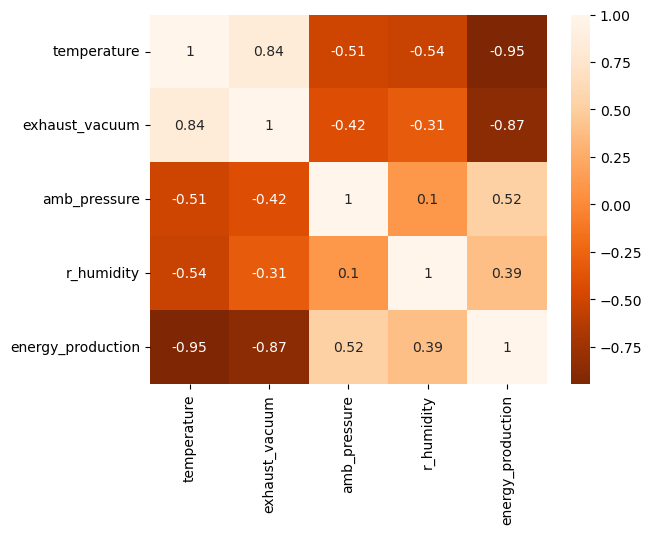

In [200]:
sns.heatmap(df.corr(),annot=True,cmap='Oranges_r')

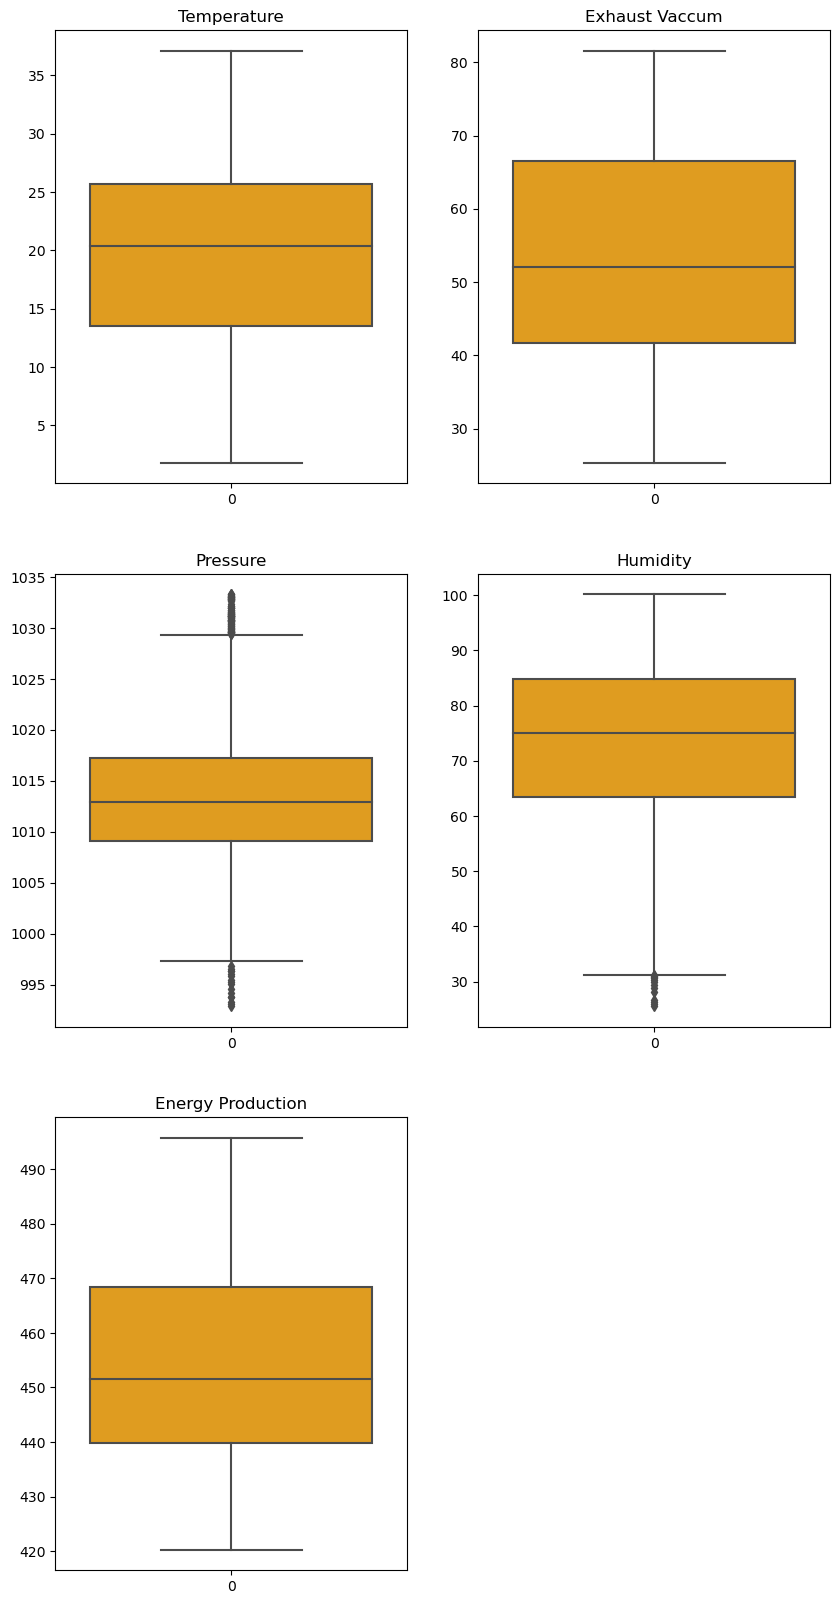

In [201]:
plt.figure(figsize=(10,20))
plt.subplot(3,2,1)
sns.boxplot(df['temperature'],color='orange')
plt.title('Temperature')
plt.subplot(3,2,2)
sns.boxplot(df['exhaust_vacuum'],color='orange')
plt.title('Exhaust Vaccum')
plt.subplot(3,2,3)
sns.boxplot(df['amb_pressure'],color='orange')
plt.title('Pressure')
plt.subplot(3,2,4)
sns.boxplot(df['r_humidity'],color='orange')
plt.title('Humidity')
plt.subplot(3,2,5)
sns.boxplot(df['energy_production'],color='orange')
plt.title('Energy Production')
plt.show()

Text(0.5, 1.0, 'Energy Production')

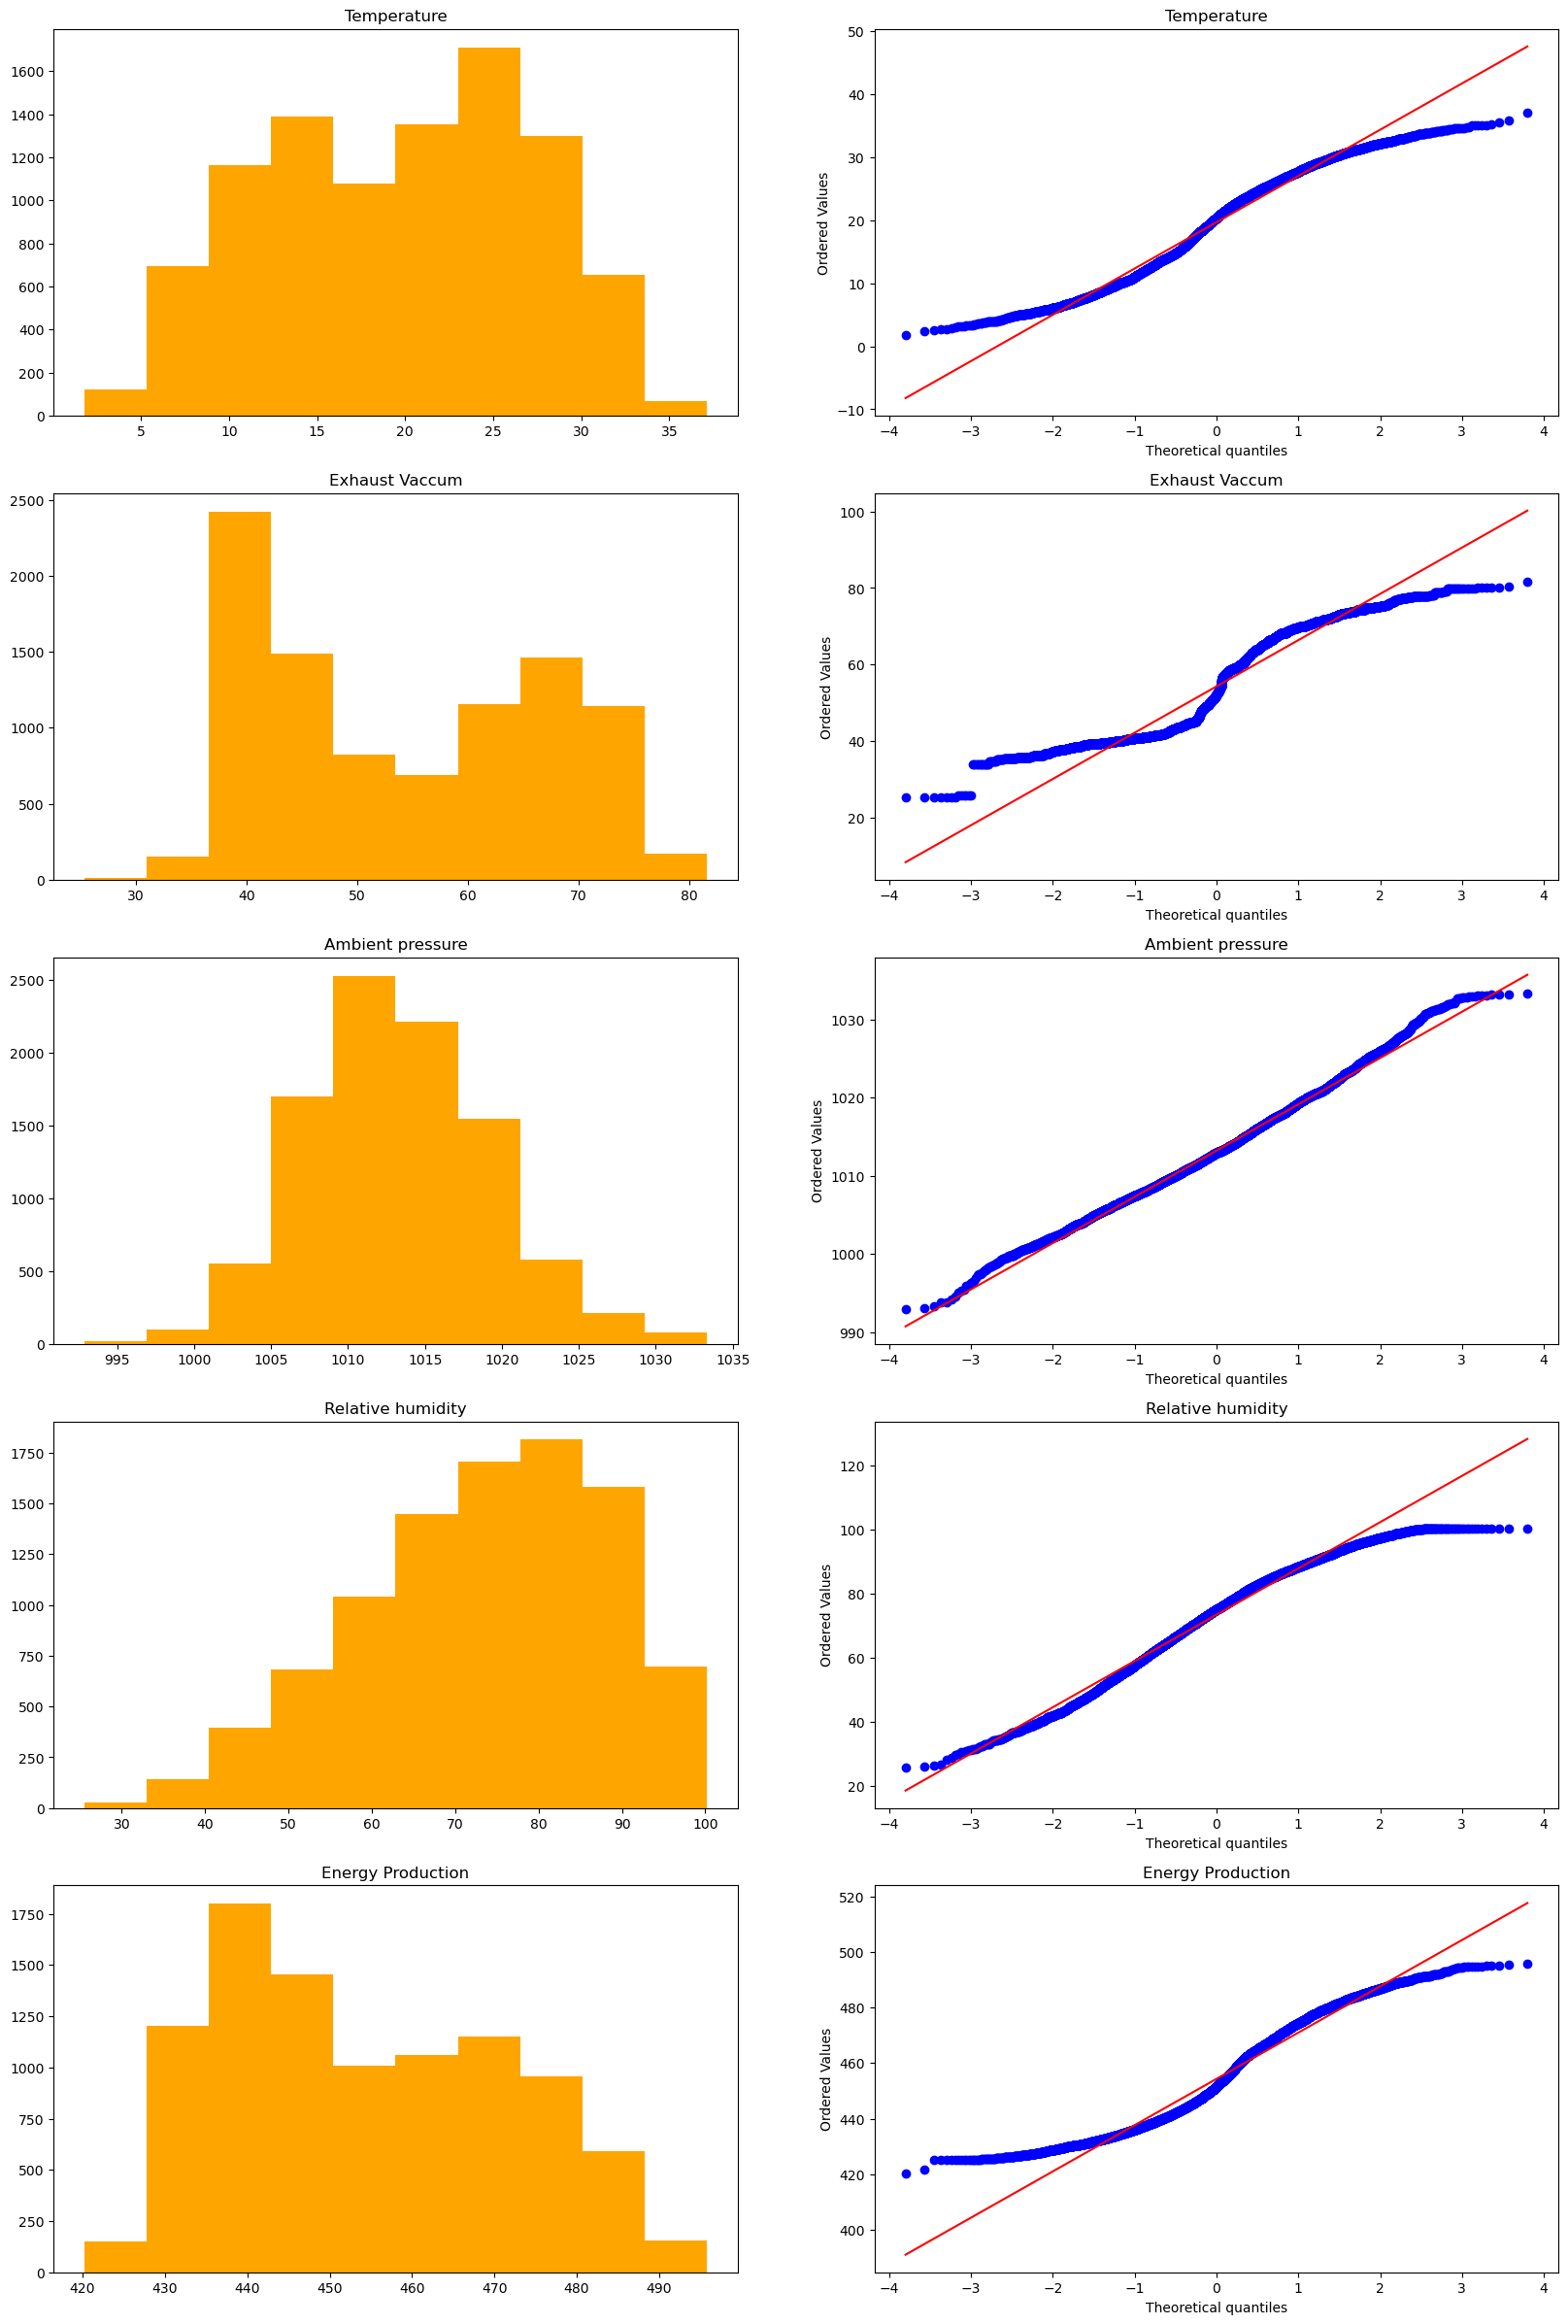

In [202]:
plt.figure(figsize=(20,30))
plt.subplot(5,2,1)
plt.hist(df['temperature'],color='orange')
plt.title('Temperature')
plt.subplot(5,2,2)
stat.probplot(df['temperature'],dist='norm',plot=pylab)
plt.title('Temperature')
plt.subplot(5,2,3)
plt.hist(df['exhaust_vacuum'],color='orange')
plt.title('Exhaust Vaccum')
plt.subplot(5,2,4)
stat.probplot(df['exhaust_vacuum'],dist='norm',plot=pylab)
plt.title('Exhaust Vaccum')
plt.subplot(5,2,5)
plt.hist(df['amb_pressure'],color='orange')
plt.title('Ambient pressure')
plt.subplot(5,2,6)
stat.probplot(df['amb_pressure'],dist='norm',plot=pylab)
plt.title('Ambient pressure')
plt.subplot(5,2,7)
plt.hist(df['r_humidity'],color='orange')
plt.title('Relative humidity')
plt.subplot(5,2,8)
stat.probplot(df['r_humidity'],dist='norm',plot=pylab)
plt.title('Relative humidity')
plt.subplot(5,2,9)
plt.hist(df['energy_production'],color='orange')
plt.title('Energy Production')
plt.subplot(5,2,10)
stat.probplot(df['energy_production'],dist='norm',plot=pylab)
plt.title('Energy Production')

In [203]:
### Relation between independent variables with dependent variables

Text(0, 0.5, 'Energy Production')

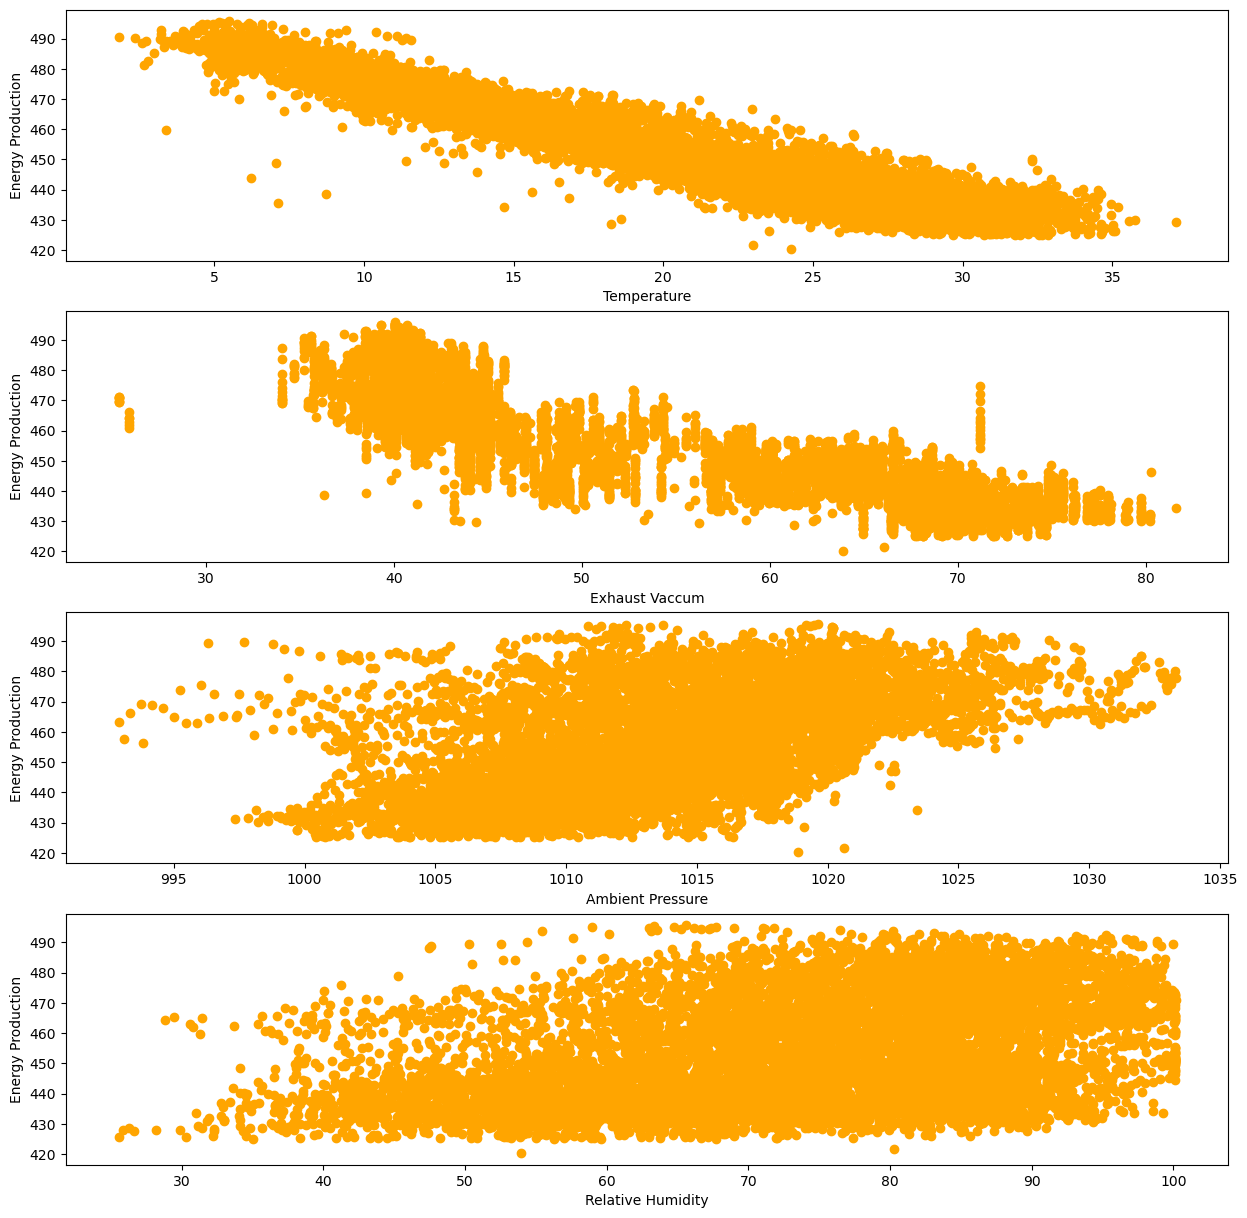

In [204]:
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
plt.scatter(df['temperature'],df['energy_production'],color='orange')
plt.xlabel('Temperature')
plt.ylabel('Energy Production')
plt.subplot(4,1,2)
plt.scatter(df['exhaust_vacuum'],df['energy_production'],color='orange')
plt.xlabel('Exhaust Vaccum')
plt.ylabel('Energy Production')
plt.subplot(4,1,3)
plt.scatter(df['amb_pressure'],df['energy_production'],color='orange')
plt.xlabel('Ambient Pressure')
plt.ylabel('Energy Production')
plt.subplot(4,1,4)
plt.scatter(df['r_humidity'],df['energy_production'],color='orange')
plt.xlabel('Relative Humidity')
plt.ylabel('Energy Production')


In [205]:
scaler=StandardScaler()
data=scaler.fit_transform(df)
data

array([[-1.35252773, -1.24025409,  0.63514812, -0.90608481,  1.58256814],
       [-1.02340389, -0.94227944,  1.09136062,  1.46062976,  0.64702254],
       [-0.77756852, -0.72628724,  1.88257786,  0.5719993 ,  0.65406554],
       ...,
       [ 1.44838336,  0.15344742, -1.35467909, -1.17034626, -1.46705226],
       [ 0.44892156,  0.92676256,  1.24118686,  0.47615318, -1.92308672],
       [-0.25634382, -0.39756918,  1.28327289, -0.6616772 ,  0.0043485 ]])

In [206]:
df1=pd.DataFrame(data,columns=df.columns)
df1

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,-1.352528,-1.240254,0.635148,-0.906085,1.582568
1,-1.023404,-0.942279,1.091361,1.460630,0.647023
2,-0.777569,-0.726287,1.882578,0.571999,0.654066
3,-0.797719,0.000519,0.783291,0.393315,0.746212
4,-0.606961,-0.366826,1.774838,0.113992,0.542551
...,...,...,...,...,...
9522,-0.343662,-0.362884,-1.297442,0.580899,0.175141
9523,0.681323,0.870794,0.367481,-1.405854,-0.435252
9524,1.448383,0.153447,-1.354679,-1.170346,-1.467052
9525,0.448922,0.926763,1.241187,0.476153,-1.923087


In [207]:
X=df.drop('energy_production',axis=1)
X

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [208]:
Y=df[['energy_production']]
Y

,energy_production
0,481.30
1,465.36
2,465.48
3,467.05
4,463.58
...,...
9563,457.32
9564,446.92
9565,429.34
9566,421.57


In [209]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=40)

In [210]:
x_train

,temperature,exhaust_vacuum,amb_pressure,r_humidity
9109,32.32,67.90,1006.08,37.93
4309,13.26,40.83,1007.97,90.63
702,14.59,41.23,999.48,86.66
960,11.45,40.80,1027.74,78.60
3653,28.84,60.23,1009.70,59.00
...,...,...,...,...
7866,26.92,51.43,1012.29,59.33
3608,25.67,58.59,1013.00,62.34
5970,13.27,52.75,1025.86,65.12
5435,23.28,60.84,1017.91,67.50


In [211]:
x_test

,temperature,exhaust_vacuum,amb_pressure,r_humidity
2355,7.41,39.16,1015.23,90.66
7196,21.19,42.48,1013.43,80.52
4707,28.48,54.20,1013.14,49.51
5582,27.23,66.48,1005.23,52.38
5478,24.43,58.20,1017.18,46.84
...,...,...,...,...
1475,31.26,68.94,1005.94,39.49
8045,37.11,68.94,1006.23,31.15
7050,32.56,68.14,1004.02,35.04
4534,17.74,44.20,1018.87,58.59


In [212]:
y_train

,energy_production
9109,428.12
4309,472.14
702,466.83
960,476.28
3653,437.82
...,...
7866,437.35
3608,451.03
5970,464.82
5435,444.13


In [213]:
y_test

,energy_production
2355,486.91
7196,469.76
4707,440.55
5582,432.55
5478,444.89
...,...
1475,438.03
8045,429.25
7050,425.11
4534,454.37


## Linear Regression

In [214]:
lin=LinearRegression()
model1=lin.fit(x_train,y_train)
y_pred1=lin.predict(x_test)
y_pred1

array([[479.55008717],
       [452.91603415],
       [440.59998506],
       ...,
       [431.06463631],
       [463.11687593],
       [480.1887206 ]])

In [215]:
model1.score(x_test,y_test)

0.927998900760237

In [216]:
lin.intercept_,lin.coef_

(array([462.26209205]),
 array([[-1.98592016, -0.23043108,  0.05445841, -0.15729617]]))

In [217]:
sse1= ((y_test-y_pred1)**2).sum()
sst1= ((y_test-y_pred1.mean())**2).sum()
R21= 1-(sse1/sst1)
rmse1=np.sqrt(mean_squared_error(y_test,y_pred1))
rmse1

4.505119796859276

<Axes: xlabel='energy_production'>

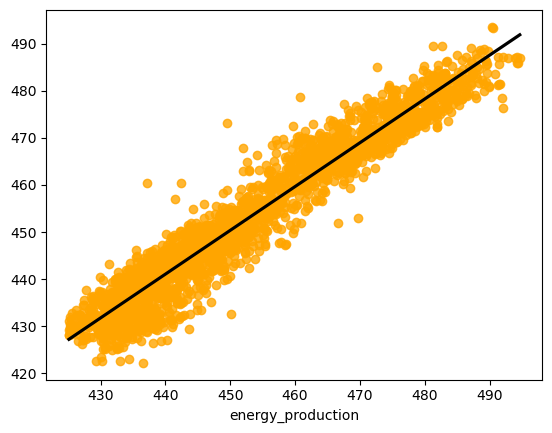

In [218]:
sns.regplot(data=df1,x=y_test,y=y_pred1,scatter_kws={'color':'orange'},line_kws={'color':'black'})

## Ridge

In [219]:
rid=Ridge()
model2=rid.fit(x_train,y_train)
y_pred2=rid.predict(x_test)
y_pred2

array([[479.54999814],
       [452.91624331],
       [440.60012496],
       ...,
       [431.06460669],
       [463.11690094],
       [480.18864273]])

In [220]:
model2.score(x_train,y_train)

0.9285205042693634

In [221]:
rid.intercept_,rid.coef_

(array([462.25454119]),
 array([[-1.98589143, -0.23044201,  0.05446555, -0.15729138]]))

In [222]:
sse2= ((y_test-y_pred2)**2).sum()
sst2= ((y_test-y_pred2.mean())**2).sum()
R22= 1-(sse2/sst2)
rmse2=np.sqrt(mean_squared_error(y_test,y_pred2))
rmse2

4.505116955002916

<Axes: xlabel='energy_production'>

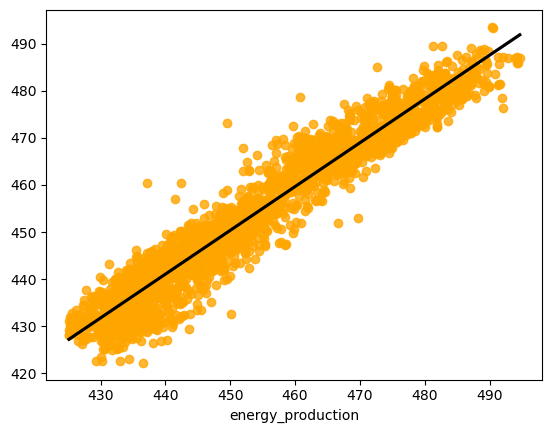

In [223]:
sns.regplot(data=df1,x=y_test,y=y_pred2,scatter_kws={'color':'orange'},line_kws={'color':'black'})

## Lasso

In [224]:
las=Lasso()
model3=las.fit(x_train,y_train)
y_pred3=rid.predict(x_test)
y_pred3

array([[479.54999814],
       [452.91624331],
       [440.60012496],
       ...,
       [431.06460669],
       [463.11690094],
       [480.18864273]])

In [225]:
model3.score(x_train,y_train)

0.9282973425188129

In [226]:
las.intercept_,rid.coef_

(array([474.02368539]),
 array([[-1.98589143, -0.23044201,  0.05446555, -0.15729138]]))

In [227]:
sse3= ((y_test-y_pred3)**2).sum()
sst3= ((y_test-y_pred3.mean())**2).sum()
R23= 1-(sse3/sst3)
rmse3=np.sqrt(mean_squared_error(y_test,y_pred3))
rmse3

4.505116955002916

<Axes: xlabel='energy_production'>

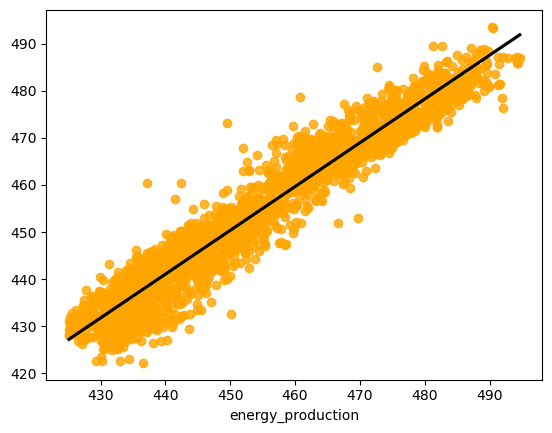

In [228]:
sns.regplot(data=df1,x=y_test,y=y_pred3,scatter_kws={'color':'orange'},line_kws={'color':'black'})

## ElasticNet

In [229]:
ela=ElasticNet(alpha = .4,l1_ratio=.5)
model4=ela.fit(x_train,y_train)
y_pred4=rid.predict(x_test)
y_pred4

array([[479.54999814],
       [452.91624331],
       [440.60012496],
       ...,
       [431.06460669],
       [463.11690094],
       [480.18864273]])

In [230]:
model4.score(x_train,y_train)

0.9284340723500979

In [231]:
ela.intercept_,ela.coef_

(array([454.3322149]),
 array([-1.93558092, -0.24897784,  0.06160217, -0.1476187 ]))

In [232]:
sse4= ((y_test-y_pred4)**2).sum()
sst4= ((y_test-y_pred4.mean())**2).sum()
R24= 1-(sse4/sst4)
rmse4=np.sqrt(mean_squared_error(y_test,y_pred4))
rmse4

4.505116955002916

<Axes: xlabel='energy_production'>

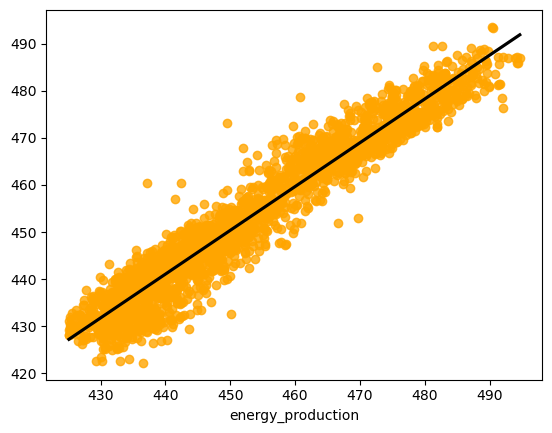

In [233]:
sns.regplot(data=df1,x=y_test,y=y_pred4,scatter_kws={'color':'orange'},line_kws={'color':'black'})